# Библиотеки

In [ ]:
pip install tensorflow==2.8.0 #2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 33.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: google-auth-oauthlib
    Fo

In [ ]:
!pip install -q pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 59.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import os
import pymorphy2
import pickle
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding, Bidirectional,Dropout,TimeDistributed,Activation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DIR='/content/drive/MyDrive/My_project/base_table/'
path_mod='/content/drive/MyDrive/My_project/Модели/'

# Предобработка данных

In [ ]:
raw = open(DIR+'для_модели/отчет/wikigold.conll (2).txt', 'r').readlines()

In [ ]:
all_x = []
point = []
for line in raw:
  stripped_line = line.strip().split('\t')
  point.append(stripped_line)
  if '*****' in line:
    all_x.append(point[:-1])
    point = []

In [ ]:
lengths = [len(x) for x in all_x]
print ('Input sequence length range: ', max(lengths), min(lengths))
short_x = [x for x in all_x if len(x) < 80]

Input sequence length range:  1469 1


In [ ]:
X = [[c[0] for c in x] for x in short_x]
y = [[c[1] for c in y] for y in short_x]
all_text = [c for x in X for c in x]

In [ ]:
words = list(set(all_text))
word2ind = {word: index for index, word in enumerate(words)}
ind2word = {index: word for index, word in enumerate(words)}
labels = list(set([c for x in y for c in x]))
label2ind = {label: (index + 1) for index, label in enumerate(labels)}
ind2label = {(index + 1): label for index, label in enumerate(labels)}
print ('Vocabulary size:', len(word2ind), len(label2ind))

maxlen = max([len(x) for x in X])
print('Maximum sequence length:', maxlen)
print(label2ind)

def encode(x, n):
    result = np.zeros(n)
    result[x] = 1
    return result

X_enc = [[word2ind[c] for c in x] for x in X]
max_label = max(label2ind.values()) + 1
y_enc = [[0] * (maxlen - len(ey)) + [label2ind[c] for c in ey] for ey in y]
y_enc = [[encode(c, max_label) for c in ey] for ey in y_enc]

X_enc = pad_sequences(X_enc, maxlen=maxlen)
y_enc = pad_sequences(y_enc, maxlen=maxlen)

Vocabulary size: 19253 3
Maximum sequence length: 79
{'O': 1, 'I-Comp': 2, 'I-Loc': 3}


In [ ]:
X_train = X_enc
y_train = y_enc
print('Training tensor shapes:', X_train.shape, y_train.shape)

Training tensor shapes: (443522, 79) (443522, 79, 4)


## Сохранение словарей для консультанта

### Запись

In [ ]:
f = open(path_mod+"словарь_слов_эт_остальные6.pkl","wb") # word2ind
pickle.dump(word2ind,f)
f.close()

In [ ]:
d = open(path_mod+"словарь_тегов_эт_остальные6.pkl","wb") #label2ind
pickle.dump(label2ind,d)
d.close()

### Чтение

In [ ]:
f=open(path_mod+"словарь_слов_эт_остальные6.pkl",'rb')
token_world=pickle.load(f)
print(token_world)

{'подкорковый': 0, 'агентство': 1, 'пирикарбат': 2, 'занесение': 3, 'мегалокорнеа': 4, 'пробор': 5, 'иосиф': 6, 'колхицин': 7, 'винсловый': 8, 'оставить': 9, 'экспериментально': 10, 'постоперационный': 11, 'бензодиазепиновый': 12, 'рот': 13, 'уделяться': 14, 'воксзый': 15, 'вичположительный': 16, 'кривошея': 17, 'фаланга': 18, 'жрец': 19, 'структура': 20, 'отменить': 21, 'кардиалгия': 22, 'блокироваться': 23, 'вибрационный': 24, 'задержка': 25, 'альфа': 26, 'аборальный': 27, 'дисфункция': 28, 'бегун': 29, 'картография': 30, 'собрать': 31, 'интраэпителиальный': 32, 'карантин': 33, 'синтез': 34, 'решить': 35, 'теплоотдача': 36, 'параэндокринный': 37, 'приподнять': 38, 'белоксинтезировать': 39, 'мтка': 40, 'клопамид': 41, 'приписывать': 42, 'поддержка': 43, 'толстой': 44, 'нестерилизованный': 45, 'маресьев': 46, 'микрохирургия': 47, 'фурацилин': 48, 'зондовый': 49, 'запаснный': 50, 'разделиться': 51, 'трудноуправляемый': 52, 'остеопороз': 53, 'крупозный': 54, 'архаичный': 55, 'детерминиро

In [ ]:
token_world['живот']

18652

In [ ]:
d=open(path_mod+"словарь_тегов_эт_остальные6.pkl",'rb')
token_label=pickle.load(d)
print(token_label)

{'O': 1, 'I-Comp': 2, 'I-Loc': 3}


In [ ]:
token_label['I-Comp']

2

# Модель и обучение модели

In [ ]:
max_features = len(word2ind)
out_size = len(label2ind) + 1
batch_size = 32
epochs=10
len_feat=443522

## Эксперимент № 1. LSTM (0.999%)

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen, mask_zero=True))
model.add(LSTM(32, return_sequences=True))
model.add(TimeDistributed(Dense(out_size)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 79, 128)           2464384   
                                                                 
 lstm_1 (LSTM)               (None, 79, 32)            20608     
                                                                 
 time_distributed_1 (TimeDis  (None, 79, 4)            132       
 tributed)                                                       
                                                                 
 activation_1 (Activation)   (None, 79, 4)             0         
                                                                 
Total params: 2,485,124
Trainable params: 2,485,124
Non-trainable params: 0
_________________________________________________________________


In [ ]:
his=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,validation_split=0.2,verbose=2) #18

Epoch 1/10
11089/11089 - 1192s - loss: 0.0014 - accuracy: 0.9991 - val_loss: 1.9428e-05 - val_accuracy: 1.0000 - 1192s/epoch - 107ms/step
Epoch 2/10
11089/11089 - 1244s - loss: 9.6437e-08 - accuracy: 1.0000 - val_loss: 1.7609e-05 - val_accuracy: 1.0000 - 1244s/epoch - 112ms/step
Epoch 3/10
11089/11089 - 1313s - loss: 4.2021e-09 - accuracy: 1.0000 - val_loss: 1.6847e-05 - val_accuracy: 1.0000 - 1313s/epoch - 118ms/step
Epoch 4/10
11089/11089 - 1190s - loss: 1.7130e-09 - accuracy: 1.0000 - val_loss: 1.6632e-05 - val_accuracy: 1.0000 - 1190s/epoch - 107ms/step
Epoch 5/10
11089/11089 - 1183s - loss: 1.0864e-09 - accuracy: 1.0000 - val_loss: 1.6528e-05 - val_accuracy: 1.0000 - 1183s/epoch - 107ms/step
Epoch 6/10
11089/11089 - 1187s - loss: 8.0158e-10 - accuracy: 1.0000 - val_loss: 1.6467e-05 - val_accuracy: 1.0000 - 1187s/epoch - 107ms/step
Epoch 7/10
11089/11089 - 1193s - loss: 6.3161e-10 - accuracy: 1.0000 - val_loss: 1.6429e-05 - val_accuracy: 1.0000 - 1193s/epoch - 108ms/step
Epoch 8/10

In [ ]:
score=model.evaluate(X_train, y_train,batch_size=batch_size)
print('score:',score)

13861/13861 [==============================] - 326s 23ms/step - loss: 3.2772e-06 - accuracy: 1.0000
score: [3.2772250051493756e-06, 0.9999991059303284]


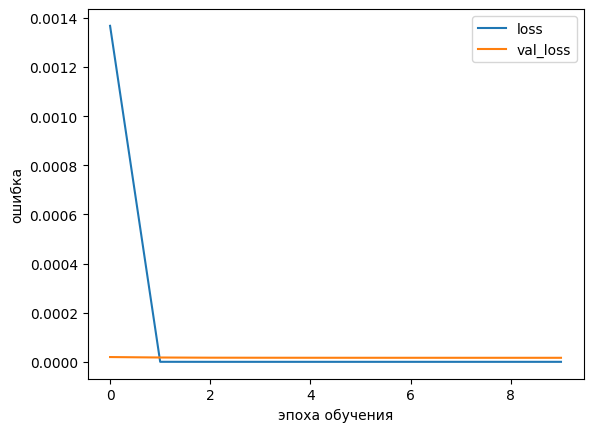

In [ ]:
plt.plot(his.history['loss'],label='loss')
plt.plot(his.history['val_loss'], label='val_loss')
plt.xlabel('эпоха обучения')
plt.ylabel('ошибка')
plt.legend()
plt.show()

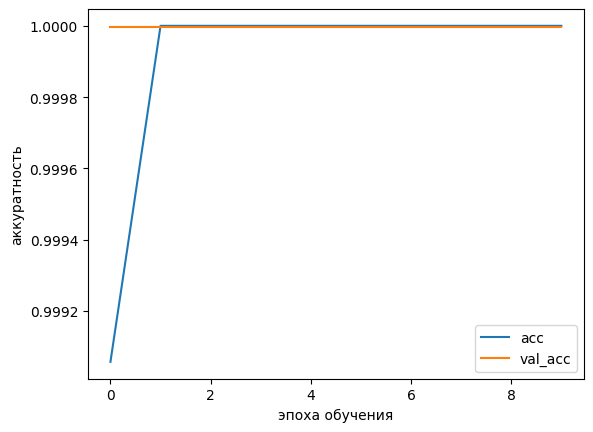

In [ ]:
plt.plot(his.history['accuracy'],label='acc')
plt.plot(his.history['val_accuracy'],label='val_acc')
plt.xlabel('эпоха обучения')
plt.ylabel('аккуратность')
plt.legend()
plt.show()

## Эксперимент № 2. Замена на BLSTM (0.964%)

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen, mask_zero=True))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(out_size)))
model.add(Activation('relu'))
model.add(Activation('softmax'))

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 79, 128)           2464384   
                                                                 
 bidirectional_1 (Bidirectio  (None, 79, 64)           41216     
 nal)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 79, 64)            0         
                                                                 
 time_distributed_1 (TimeDis  (None, 79, 4)            260       
 tributed)                                                       
                                                                 
 activation_26 (Activation)  (None, 79, 4)             0         
                                                                 
 activation_27 (Activation)  (None, 79, 4)           

/usr/local/lib/python3.10/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
his=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,validation_split=0.2,verbose=2) #18

Epoch 1/10
11089/11089 - 1535s - loss: 0.0381 - accuracy: 0.9646 - val_loss: 0.0364 - val_accuracy: 0.9659 - 1535s/epoch - 138ms/step
Epoch 2/10
11089/11089 - 1536s - loss: 0.0376 - accuracy: 0.9647 - val_loss: 0.0363 - val_accuracy: 0.9659 - 1536s/epoch - 139ms/step
Epoch 3/10
11089/11089 - 1549s - loss: 0.0376 - accuracy: 0.9647 - val_loss: 0.0362 - val_accuracy: 0.9659 - 1549s/epoch - 140ms/step
Epoch 4/10
11089/11089 - 1544s - loss: 0.0375 - accuracy: 0.9647 - val_loss: 0.0362 - val_accuracy: 0.9659 - 1544s/epoch - 139ms/step
Epoch 5/10
11089/11089 - 1552s - loss: 0.0375 - accuracy: 0.9647 - val_loss: 0.0362 - val_accuracy: 0.9659 - 1552s/epoch - 140ms/step
Epoch 6/10
11089/11089 - 1552s - loss: 0.0375 - accuracy: 0.9647 - val_loss: 0.0362 - val_accuracy: 0.9659 - 1552s/epoch - 140ms/step
Epoch 7/10
11089/11089 - 1581s - loss: 0.0374 - accuracy: 0.9647 - val_loss: 0.0361 - val_accuracy: 0.9659 - 1581s/epoch - 143ms/step
Epoch 8/10
11089/11089 - 1547s - loss: 0.0374 - accuracy: 0.96

In [ ]:
score=model.evaluate(X_train, y_train,batch_size=batch_size)
print('score:',score)

13861/13861 [==============================] - 483s 35ms/step - loss: 0.0370 - accuracy: 0.9649
score: [0.036957528442144394, 0.9649283289909363]


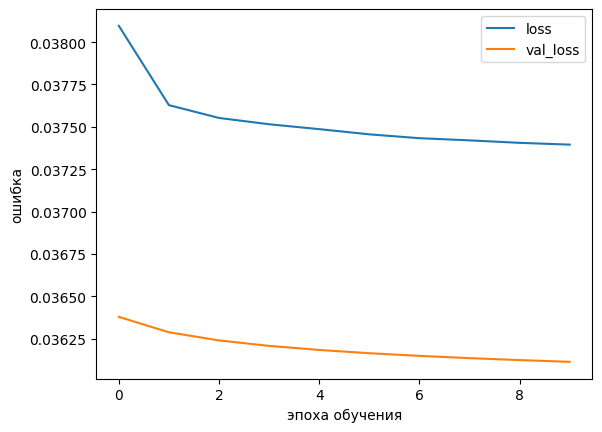

In [ ]:
plt.plot(his.history['loss'],label='loss')
plt.plot(his.history['val_loss'], label='val_loss')
plt.xlabel('эпоха обучения')
plt.ylabel('ошибка')
plt.legend()
plt.show()

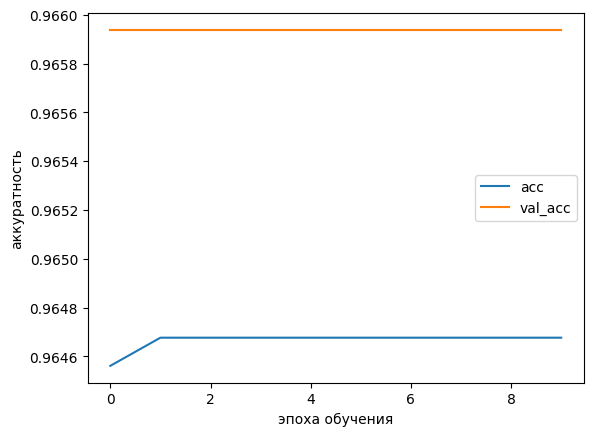

In [ ]:
plt.plot(his.history['accuracy'],label='acc')
plt.plot(his.history['val_accuracy'],label='val_acc')
plt.xlabel('эпоха обучения')
plt.ylabel('аккуратность')
plt.legend()
plt.show()

In [ ]:
model.save(path_mod+'эталонная_модель3')

## Эксперимент № 3. Полносвязная с нормализацией (0.999%)

In [ ]:
from keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen, mask_zero=True))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 79, 128)           2464384   
                                                                 
 dense (Dense)               (None, 79, 512)           66048     
                                                                 
 batch_normalization (BatchN  (None, 79, 512)          2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 79, 512)           0         
                                                                 
 dense_1 (Dense)             (None, 79, 256)           131328    
                                                                 
 batch_normalization_1 (Batc  (None, 79, 256)          1024      
 hNormalization)                                        

In [ ]:
his=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,validation_split=0.2,verbose=2) #18

Epoch 1/10
11089/11089 - 1481s - loss: 3.1373e-04 - accuracy: 0.9997 - val_loss: 1.8984e-05 - val_accuracy: 1.0000 - 1481s/epoch - 134ms/step
Epoch 2/10
11089/11089 - 1500s - loss: 2.8950e-09 - accuracy: 1.0000 - val_loss: 2.2352e-05 - val_accuracy: 1.0000 - 1500s/epoch - 135ms/step
Epoch 3/10
11089/11089 - 1486s - loss: 6.5443e-11 - accuracy: 1.0000 - val_loss: 2.3812e-05 - val_accuracy: 1.0000 - 1486s/epoch - 134ms/step
Epoch 4/10
11089/11089 - 1471s - loss: 1.8342e-11 - accuracy: 1.0000 - val_loss: 2.4325e-05 - val_accuracy: 1.0000 - 1471s/epoch - 133ms/step
Epoch 5/10
11089/11089 - 1498s - loss: 8.6840e-11 - accuracy: 1.0000 - val_loss: 2.4812e-05 - val_accuracy: 1.0000 - 1498s/epoch - 135ms/step
Epoch 6/10
11089/11089 - 1494s - loss: 1.3566e-11 - accuracy: 1.0000 - val_loss: 2.5249e-05 - val_accuracy: 1.0000 - 1494s/epoch - 135ms/step
Epoch 7/10
11089/11089 - 1498s - loss: 5.3330e-12 - accuracy: 1.0000 - val_loss: 2.5472e-05 - val_accuracy: 1.0000 - 1498s/epoch - 135ms/step
Epoch 

In [ ]:
score=model.evaluate(X_train, y_train,batch_size=batch_size)
print('score:',score)

13861/13861 [==============================] - 425s 31ms/step - loss: 5.2494e-06 - accuracy: 1.0000
score: [5.249413334240671e-06, 0.9999991059303284]


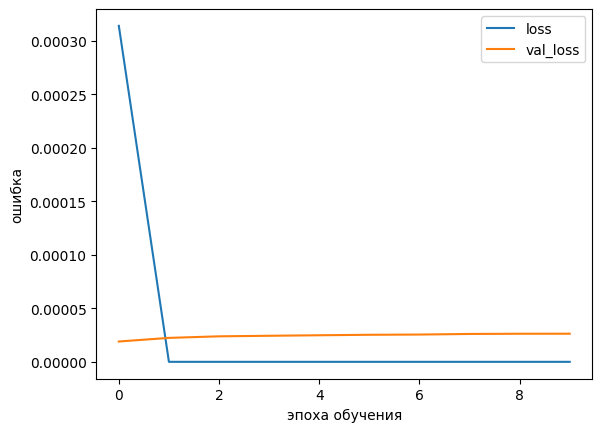

In [ ]:
plt.plot(his.history['loss'],label='loss')
plt.plot(his.history['val_loss'], label='val_loss')
plt.xlabel('эпоха обучения')
plt.ylabel('ошибка')
plt.legend()
plt.show()

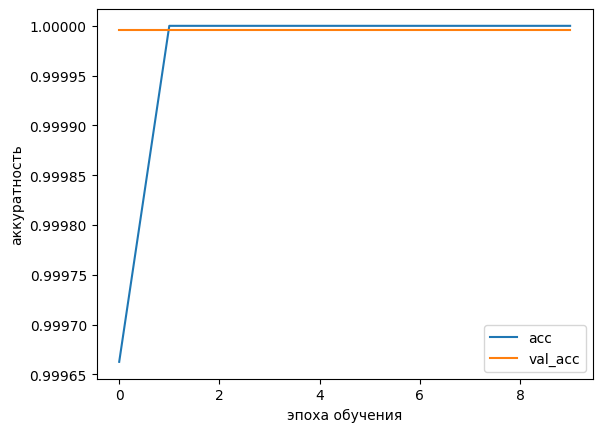

In [ ]:
plt.plot(his.history['accuracy'],label='acc')
plt.plot(his.history['val_accuracy'],label='val_acc')
plt.xlabel('эпоха обучения')
plt.ylabel('аккуратность')
plt.legend()
plt.show()

In [ ]:
model.save(path_mod+'эталонная_модель4')

## Эксперимент № 4. Сверточная (0.993%)

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [ ]:
test_shape=X_train.reshape((443522, 79,1))

In [ ]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=(79,1)))
#model.add(MaxPooling1D())
model.add(Conv1D(filters=512, kernel_size=1, activation='relu'))
#model.add(MaxPooling1D())
model.add(Conv1D(filters=256, kernel_size=1, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_73 (Conv1D)          (None, 79, 128)           256       
                                                                 
 conv1d_74 (Conv1D)          (None, 79, 512)           66048     
                                                                 
 conv1d_75 (Conv1D)          (None, 79, 256)           131328    
                                                                 
 dense_73 (Dense)            (None, 79, 128)           32896     
                                                                 
 dropout_49 (Dropout)        (None, 79, 128)           0         
                                                                 
 dense_74 (Dense)            (None, 79, 64)            8256      
                                                                 
 dropout_50 (Dropout)        (None, 79, 64)          

In [ ]:
his=model.fit(test_shape, y_train, batch_size=32, epochs=epochs,validation_split=0.2) #18

Epoch 1/10
11089/11089 [==============================] - 1623s 146ms/step - loss: 0.0984 - accuracy: 0.9920 - val_loss: 0.0325 - val_accuracy: 0.9936
Epoch 2/10
11089/11089 [==============================] - 1537s 139ms/step - loss: 0.0425 - accuracy: 0.9932 - val_loss: 0.0325 - val_accuracy: 0.9936
Epoch 3/10
11089/11089 [==============================] - 1541s 139ms/step - loss: 0.0343 - accuracy: 0.9932 - val_loss: 0.0324 - val_accuracy: 0.9936
Epoch 4/10
11089/11089 [==============================] - 1547s 139ms/step - loss: 0.0335 - accuracy: 0.9933 - val_loss: 0.0323 - val_accuracy: 0.9936
Epoch 5/10
11089/11089 [==============================] - 1547s 140ms/step - loss: 0.0401 - accuracy: 0.9932 - val_loss: 0.0326 - val_accuracy: 0.9936
Epoch 6/10
11089/11089 [==============================] - 1547s 140ms/step - loss: 0.0340 - accuracy: 0.9933 - val_loss: 0.0323 - val_accuracy: 0.9936
Epoch 7/10
11089/11089 [==============================] - 1554s 140ms/step - loss: 0.0348 - ac

In [ ]:
score=model.evaluate(X_train, y_train,batch_size=batch_size)
print('score:',score)

13861/13861 [==============================] - 526s 38ms/step - loss: 0.0331 - accuracy: 0.9934
score: [0.033119384199380875, 0.9933788776397705]


In [ ]:
plt.plot(his.history['loss'],label='loss')
plt.plot(his.history['val_loss'], label='val_loss')
plt.xlabel('эпоха обучения')
plt.ylabel('ошибка')
plt.legend()
plt.show()

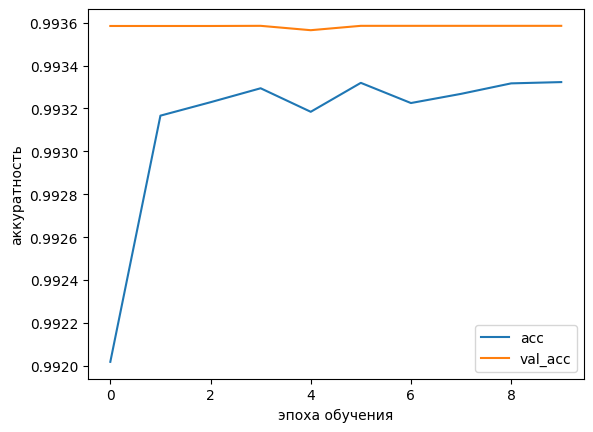

In [ ]:
plt.plot(his.history['accuracy'],label='acc')
plt.plot(his.history['val_accuracy'],label='val_acc')
plt.xlabel('эпоха обучения')
plt.ylabel('аккуратность')
plt.legend()
plt.show()

In [ ]:
model.save(path_mod+'эталонная_модель5')

## Эксперимент № 5. Сверточная + BLSTM (1.0%)

In [ ]:
from keras.layers import GlobalMaxPooling1D

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, MaxPooling1D, LSTM, GRU, Bidirectional, TimeDistributed, Dense

In [ ]:
test_shape=X_train.reshape((443522, 79,1))

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen, mask_zero=True))
model.add(Conv1D(filters=128, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(128, return_sequences=True)))

model.add(GRU(units=32, return_sequences=True))
model.add(TimeDistributed(Dense(out_size, activation='softmax')))

#model.add(Dropout(0.3))
#model.add(Dense(out_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 79, 128)           2464384   
                                                                 
 conv1d (Conv1D)             (None, 79, 128)           16512     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 79, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 79, 128)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 79, 256)          263168    
 l)                                                              
                                                                 
 gru (GRU)                   (None, 79, 32)            2

In [ ]:
his=model.fit(X_train, y_train, batch_size=64, epochs=epochs,validation_split=0.2,verbose=2) #18

Epoch 1/10
5545/5545 - 2973s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 1.4645e-05 - val_accuracy: 1.0000 - 2973s/epoch - 536ms/step
Epoch 2/10
5545/5545 - 3098s - loss: 3.6441e-06 - accuracy: 1.0000 - val_loss: 1.1883e-05 - val_accuracy: 1.0000 - 3098s/epoch - 559ms/step
Epoch 3/10
5545/5545 - 3074s - loss: 2.0139e-07 - accuracy: 1.0000 - val_loss: 1.3892e-05 - val_accuracy: 1.0000 - 3074s/epoch - 554ms/step
Epoch 4/10
5545/5545 - 3042s - loss: 1.2482e-07 - accuracy: 1.0000 - val_loss: 1.3921e-05 - val_accuracy: 1.0000 - 3042s/epoch - 549ms/step
Epoch 5/10
5545/5545 - 3123s - loss: 1.2025e-07 - accuracy: 1.0000 - val_loss: 1.3920e-05 - val_accuracy: 1.0000 - 3123s/epoch - 563ms/step
Epoch 6/10
5545/5545 - 2990s - loss: 1.1956e-07 - accuracy: 1.0000 - val_loss: 1.3920e-05 - val_accuracy: 1.0000 - 2990s/epoch - 539ms/step
Epoch 7/10
5545/5545 - 2999s - loss: 1.1943e-07 - accuracy: 1.0000 - val_loss: 1.3920e-05 - val_accuracy: 1.0000 - 2999s/epoch - 541ms/step
Epoch 8/10
5545/5545 - 2

In [ ]:
score=model.evaluate(X_train, y_train,batch_size=batch_size)
print('score:',score)

13861/13861 [==============================] - 1474s 106ms/step - loss: 2.8794e-06 - accuracy: 1.0000
score: [2.879359271901194e-06, 1.0]


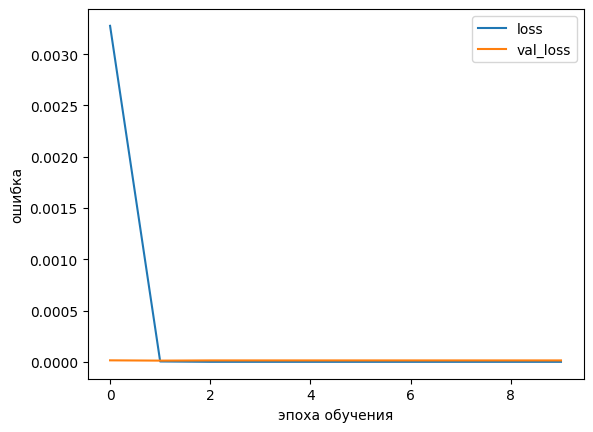

In [ ]:
plt.plot(his.history['loss'],label='loss')
plt.plot(his.history['val_loss'], label='val_loss')
plt.xlabel('эпоха обучения')
plt.ylabel('ошибка')
plt.legend()
plt.show()

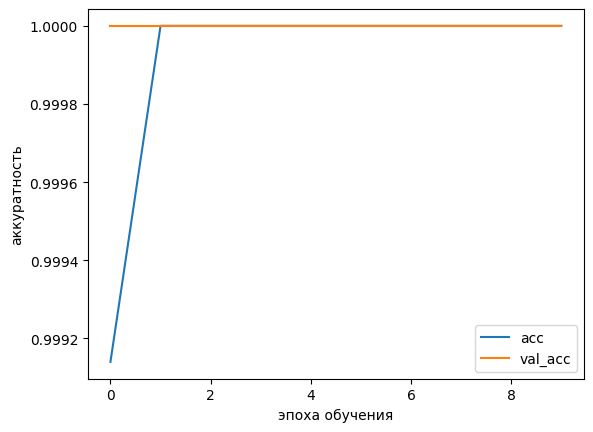

In [ ]:
plt.plot(his.history['accuracy'],label='acc')
plt.plot(his.history['val_accuracy'],label='val_acc')
plt.xlabel('эпоха обучения')
plt.ylabel('аккуратность')
plt.legend()
plt.show()

In [ ]:
model.save(path_mod+'эталонная_модель6')

#Тестирование НС

In [ ]:
model= tf.keras.models.load_model(path_mod+'эталонная_модель6')
f=open(path_mod+"словарь_слов_эт_остальные6.pkl",'rb') #загрузка сохраненного словаря слов
word2ind=pickle.load(f)
d=open(path_mod+"словарь_тегов_эт_остальные6.pkl",'rb') #загрузка сохраненного словаря классов
label2ind=pickle.load(d)

In [ ]:
string = 'второй день просыпаюсь ночью с ощущением сильной боли в сердце, болью в животе, а анализ показал низкий индекс холестерина'
string=string.lower()
wordlist=string.replace(",", "").replace(".", "").split(' ')
morph = pymorphy2.MorphAnalyzer()
ip = []
for i in wordlist:
  try:
    x=morph.parse(i)[0].normal_form
    ip.append(word2ind[x])
  except:
    ip.append(0)

In [ ]:
maxlen=79
num=maxlen-len(ip)
temp=[0]*num
iplen=temp+ip
out=np.argmax(model.predict([iplen]), axis=-1)

In [ ]:
dict_per = []
for i in range(len(out[0])):
  for j in label2ind:
    if label2ind[j] == out[0][i]:
      dict_per.append(j)
  i=i+1

print(wordlist)
print(dict_per)

['второй', 'день', 'просыпаюсь', 'ночью', 'с', 'ощущением', 'сильной', 'боли', 'в', 'сердце', 'болью', 'в', 'животе', 'а', 'анализ', 'показал', 'низкий', 'индекс', 'холестерина']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-Comp', 'O', 'I-Loc', 'I-Comp', 'O', 'I-Loc', 'O', 'O', 'O', 'I-Comp', 'I-Comp', 'I-Comp']


In [ ]:
#contr_wordlist=temp+wordlist
list_problem=[]
for i in range(len(dict_per)):
  if dict_per[i] == 'I-Loc' or dict_per[i] == 'I-Comp':
    if type(wordlist[i]) == str:
      list_problem.append(wordlist[i])

list_problem

['боли', 'сердце', 'болью', 'животе', 'низкий', 'индекс', 'холестерина']